In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from Plots import *

from DataProduction import *

from SupportingFunctions import *

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import scipy
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.decomposition import PCA
run_list=[285490,286498,287987,288543,289413,289733,291970,293528]
color_list_=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan']

In [3]:
dataProduction=dataProd()
mix_=dataProduction.multipleRun(285490,286498,287987,288543,289413,289733,291970,293528)
mix=mix_.copy()

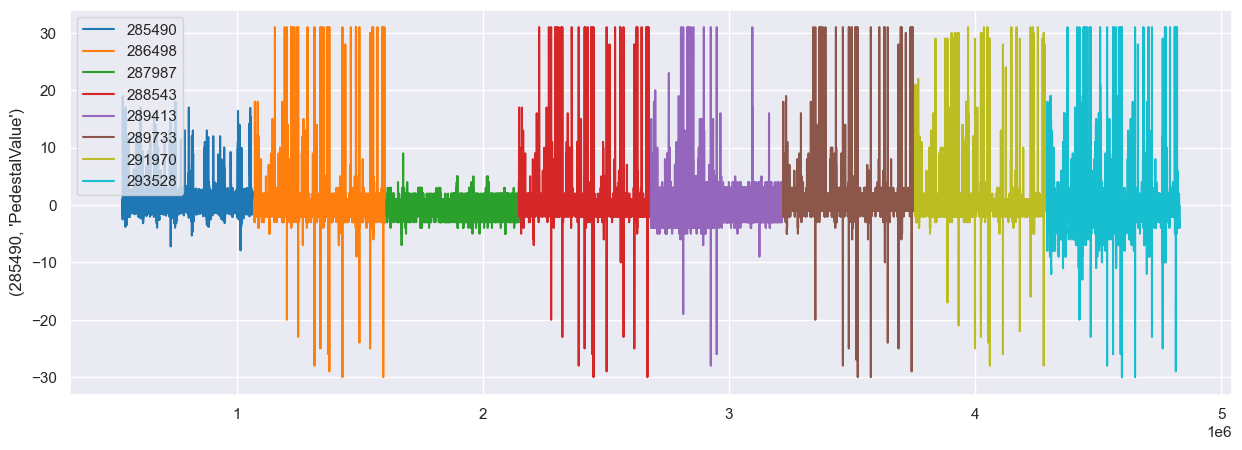

In [4]:
#easy comparison between multiple runs.
len=mix.shape[0]
for i,v in enumerate(run_list):
    sns.lineplot(x=np.arange((i+1)*len,(i+2)*len),y=mix[v,"PedestalValue"],label=v,color=color_list_[i])
plt.legend()
plt.show()

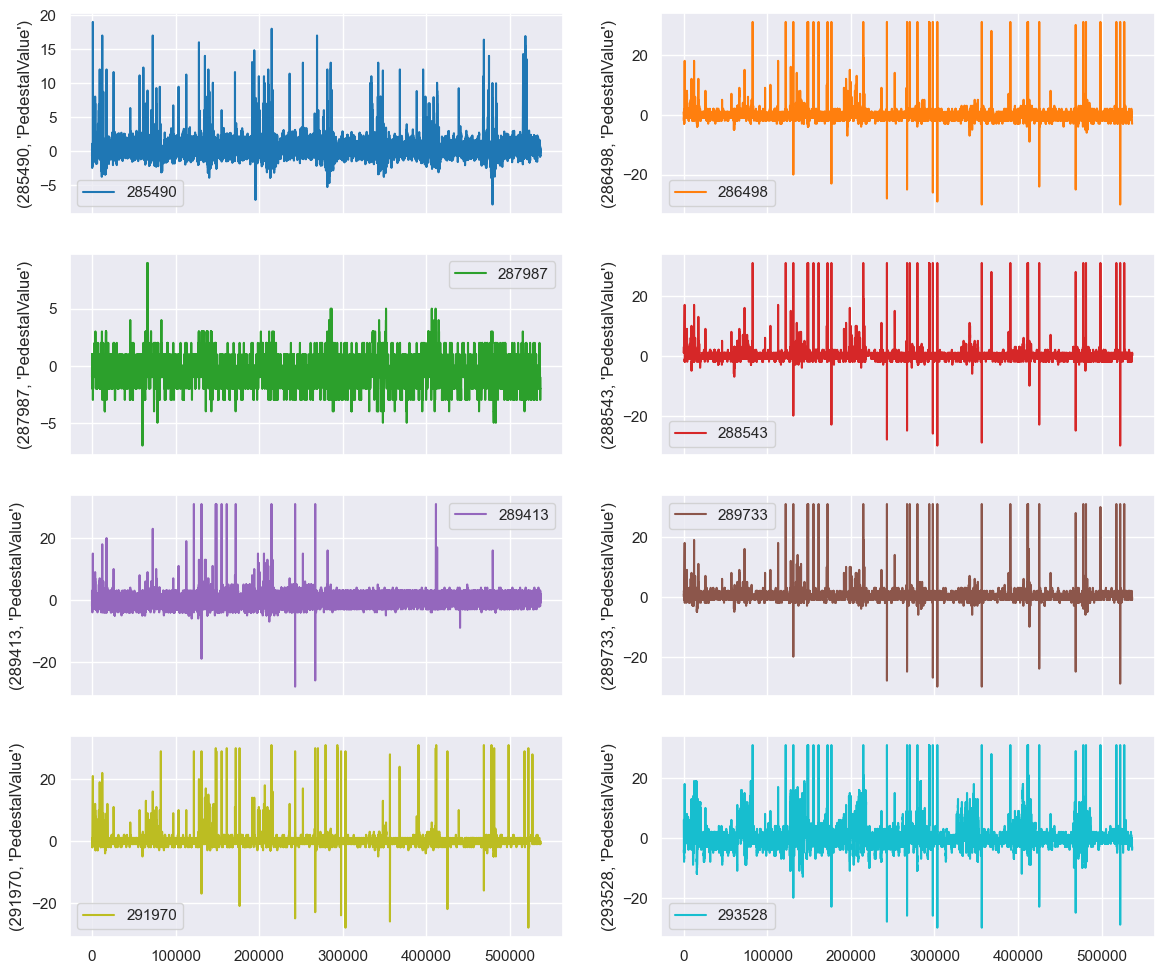

In [10]:
fig,ax=plt.subplots(4,2,figsize=(14,12),sharex=True, sharey=False)
axes = ax.flatten()
for i,v in enumerate(run_list):

    sns.lineplot(mix[v,'PedestalValue'],label=v,ax=axes[i],color=color_list_[i])
plt.savefig('/Users/sabinhashmi/Drive/Projects/ut-decision-maker/Notebooks/Plots/PedastalValues.png',bbox_inches='tight',format='png', transparent=True)

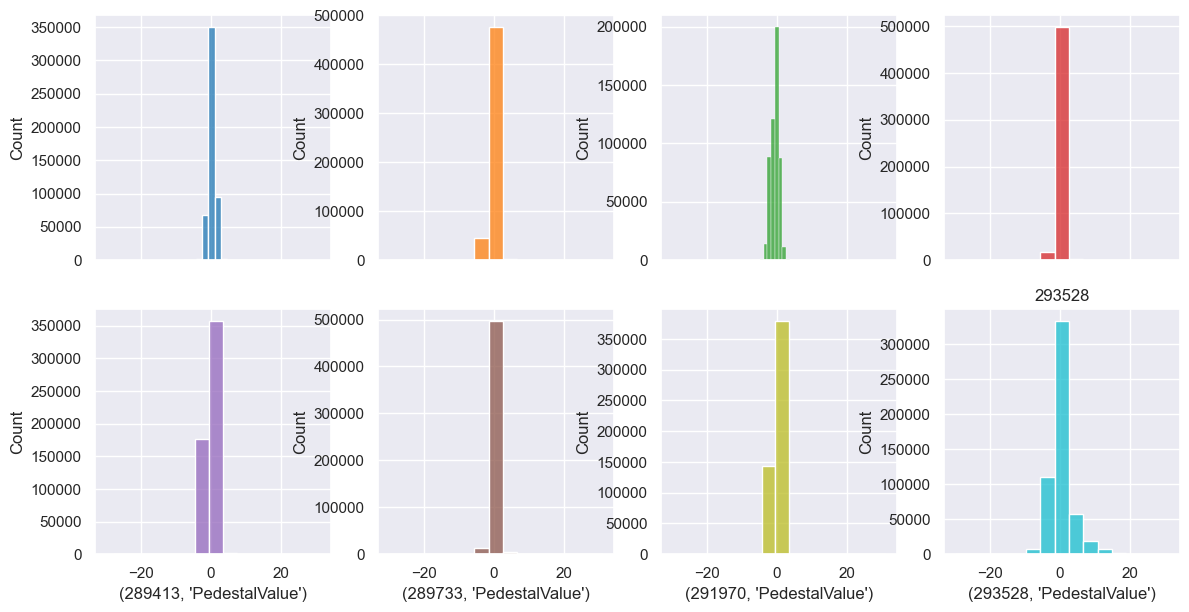

In [6]:
fig,ax=plt.subplots(2,4,figsize=(14,7),sharex=True,)# sharey=True, )
axes = ax.flatten()
for i,v in enumerate(run_list):

    sns.histplot(mix[v,'PedestalValue'],label=v,bins=15,ax=axes[i],fill=True,color=color_list_[i])
    plt.title(v)


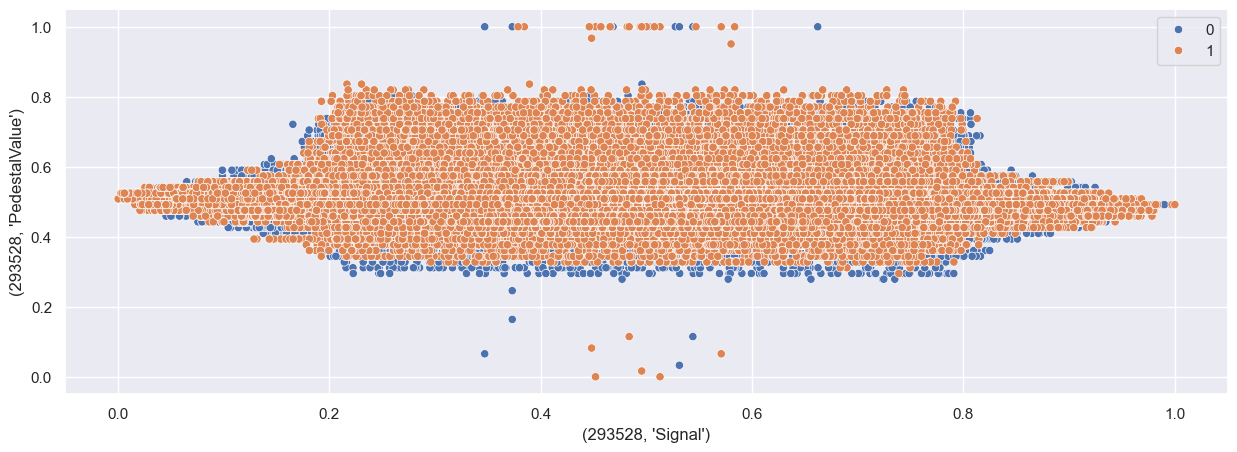

In [8]:
#Clustering
scaler=MinMaxScaler()
def clusterPlot(data,cluster_model,runNumber):
    scaled_=scaler.fit_transform(data)
    scaled_=pd.DataFrame(scaled_,columns=data.columns)
    cluster_model.fit(data)
    label=cluster_model.labels_
    sns.scatterplot(x=scaled_[runNumber,"Signal"],y=scaled_[runNumber,'PedestalValue'],hue=label)

kmeans=KMeans(n_clusters=2)
clusterPlot(data=mix.select_dtypes(exclude='object').fillna(0),cluster_model=kmeans,runNumber=293528)

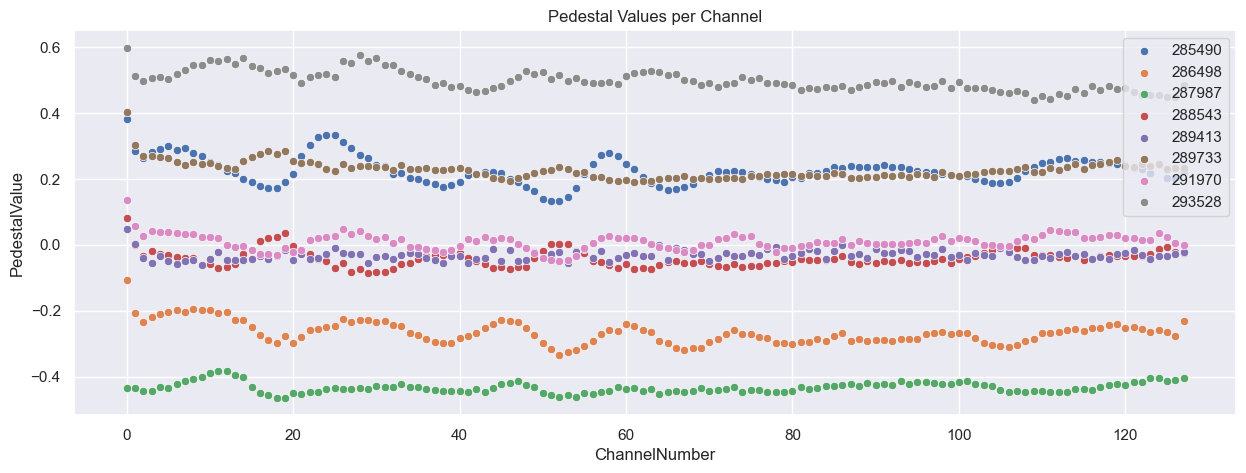

In [9]:
for i in run_list:
    channel_level=mix[i].select_dtypes(exclude='object').groupby(by="ChannelNumber").agg('mean')
    sns.scatterplot(channel_level["PedestalValue"],label=i)
    plt.title("Pedestal Values per Channel")
    plt.legend()

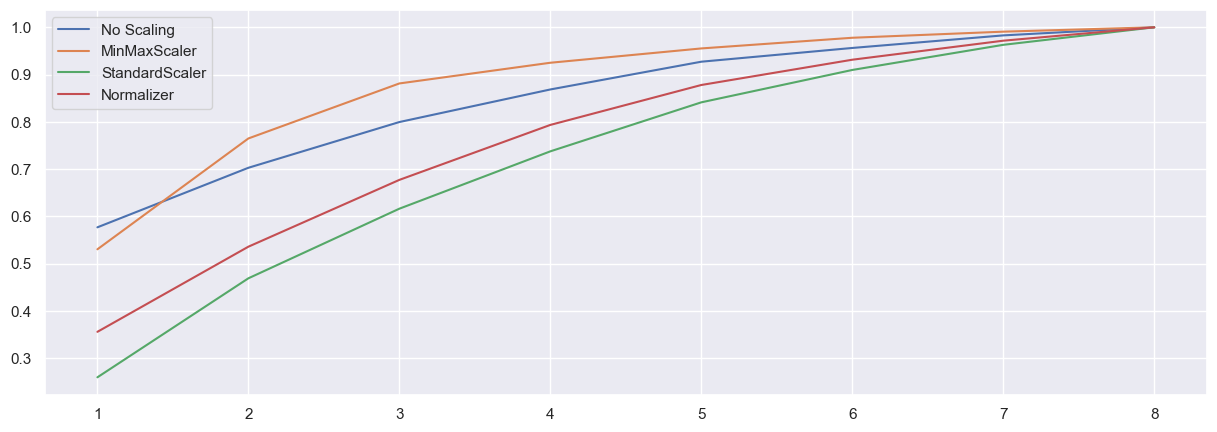

In [10]:
scalers=[MinMaxScaler(),StandardScaler(),Normalizer()]

pedestalOnly=pd.DataFrame(index=np.arange(mix.shape[0]))
for i,v in enumerate(run_list):
    pedestalOnly[f'Run{i+1}']=mix[v,'PedestalValue']

pedestalOnly.fillna(0,inplace=True)

variance_ratio_=[]
for i in range(1,9):
        pca=PCA(n_components=i)
        pcaData=pd.DataFrame(pca.fit_transform(pedestalOnly))
        variance_ratio_.append(np.cumsum(pca.explained_variance_ratio_)[-1])
sns.lineplot(x=np.arange(1,9),y=variance_ratio_,label='No Scaling')

for scaler in scalers:
    scaled=pd.DataFrame(scaler.fit_transform(pedestalOnly),columns=pedestalOnly.columns)
    variance_ratio_=[]
    for i in range(1,9):
        pca=PCA(n_components=i)
        pcaData=pd.DataFrame(pca.fit_transform(scaled))
        variance_ratio_.append(np.cumsum(pca.explained_variance_ratio_)[-1])
    sns.lineplot(x=np.arange(1,9),y=variance_ratio_,label=str(scaler).replace('()',''),markers='o')

plt.legend()
plt.show()